## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## Read the data

In [2]:
churn_data = pd.read_csv('DATA_Customer-Churn.csv')
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


## Short exploration

In [3]:
# Make all column names lowercase
churn_data.columns = [col.lower() for col in churn_data.columns]

In [4]:
# Check for missing values and data types
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

It seems like there are no missing values. However, when we try to convert the type in `TotalCharges`, we get a `ValueError`

```python
pd.to_numeric(churn_data['totalcharges'])
```
```
> ValueError: Unable to parse string " " 
```

Apparently some values are just a single space character `" "` (which probably represents missing data). Let's deal with them:

In [5]:
# Convert 'totalcharges' to numeric and fill generated NaN with the mean of the column
churn_data['totalcharges'] = pd.to_numeric(churn_data['totalcharges'], errors='coerce') # invalid parsing will be set as NaN
churn_data['totalcharges'].fillna(churn_data['totalcharges'].mean(), inplace=True) # replace NaN by the mean

In [6]:
# Check if the changes took place
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

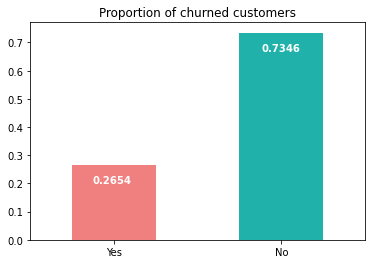

In [7]:
# Check the target variable
churn_data['churn'].value_counts(normalize=True, sort=True, ascending=True).plot.bar(rot=0, color=['LightCoral', 'LightSeaGreen'])

yes_label = churn_data['churn'].value_counts(normalize=True).round(4)['Yes']
no_label = churn_data['churn'].value_counts(normalize=True).round(4)['No']

plt.title('Proportion of churned customers')
plt.annotate(yes_label, xy=(0, 0.3), xytext=(-0.13, 0.2), color='white', weight='bold')
plt.annotate(no_label, xy=(1, 0.7), xytext=(0.88, 0.67), color='white', weight='bold')
plt.show()

The data is inbalanced: there are 2.8 times more customers that haven't churned.

In [8]:
churn_data['churn'].value_counts(normalize=True, sort=True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

## X/y split

In [9]:
X = churn_data.select_dtypes('number')
y = churn_data['churn']

## Train/test split and standardization

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

## Logistic regression

In [11]:
log_reg = LogisticRegression().fit(X_train, y_train)
y_hat = log_reg.predict(X_test)

print(classification_report(y_test, y_hat, digits=4))

              precision    recall  f1-score   support

          No     0.8179    0.9220    0.8668      1539
         Yes     0.6825    0.4495    0.5420       574

    accuracy                         0.7937      2113
   macro avg     0.7502    0.6858    0.7044      2113
weighted avg     0.7811    0.7937    0.7786      2113



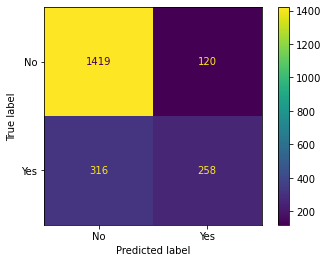

In [12]:
cm = confusion_matrix(y_test, y_hat)
disp = ConfusionMatrixDisplay(cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

The overall accuracy is 0.7937. The model is better at predicting the label 'No' (recall = 0.9220), probably because of the inbalencement of the data (there are way more 'No' than 'Yes' labels).